In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
import seaborn as sns

from scipy.optimize import minimize

In [167]:
import matplotlib

In [139]:
blue = np.array([58., 195., 242.]) / 255
pink = np.array([237., 38., 133.]) / 255
orange = np.array([245, 128, 50]) / 255
yellow = np.array([241, 211, 33]) / 255
gray = np.array([150, 150, 150]) / 255
red = np.array([237, 18, 98]) / 255
green = np.array([18, 237, 157]) / 255

In [30]:
minimize?

In [119]:
def f(x, a, b, c, d, e):
    return a / (np.exp(-b*(x-e)) + 1) - c * (x-e) + d

In [120]:
def df(x, a, b, c, d, e):
    numerator = a * b * np.exp(b*(x-e))
    denominator = (1 + np.exp(b*x-e))**2
    return -c + numerator/denominator

### Curve fitting (not working)

In [121]:
def loss(params):
#     f(0) = 3
#     f(2) = 9 # timing is mean of 0.2 + gamma(1.8) and peak is mean of uniform(7, 11)
#     f(7.5) = 6 # timing is mean of uniform(5,10)
#     derivative at 2 is 0

    return ((f(0, *params) - 3)**2 + 
            (f(2, *params) - 9)**2 +
            (f(7.5, *params) - 6)**2 + 
            (10*df(2, *params)) 
           )

In [122]:
res = minimize(loss, [10, 3, .5, 0, 0])

### Hand tuning

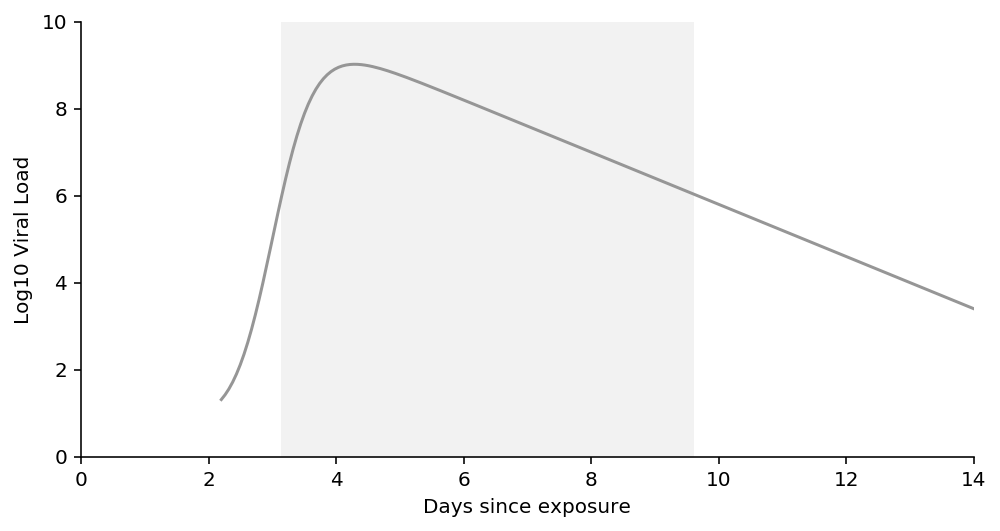

In [195]:
plt.figure(figsize=[8, 4])
x = np.linspace(2.2, 14, 200)
offset = 2.3
plt.plot(x, f(x, a=10, b=3, c=.6, d=0, e=.7+offset), color=gray)
plt.ylim([0, 10])
plt.xlim([0, 14])
plt.xlabel('Days since exposure')
plt.ylabel('Log10 Viral Load')
rect = matplotlib.patches.Rectangle(xy=(3.15, 0), width=9.6-3.15, height=10, color=[0.95, 0.95, 0.95])
# plt.scatter([0+offset], [3])
# plt.scatter([2+offset], [9])
# plt.scatter([7.5+offset], 6)
plt.gca().add_patch(rect)
sns.despine()

In [187]:
f(3.15, a=10, b=3, c=.6, d=0, e=.7+offset)

6.01639233949222

In [192]:
f(9.6, a=10, b=3, c=.6, d=0, e=.7+offset)

6.039999974825015

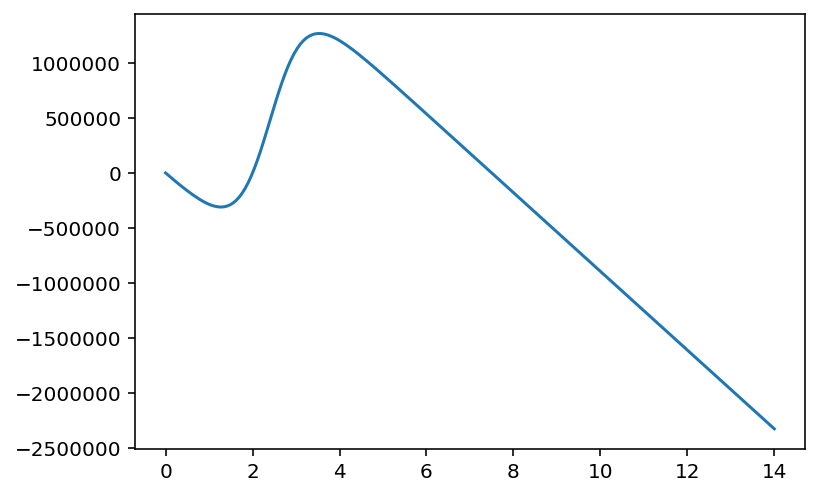

In [124]:
plt.plot(x, f(x, *res.x))

In [28]:
np.random.gamma(shape=1.8, size=10000).mean()

1.812442566192213

In [201]:
pal = sns.color_palette("husl", 3)

Text(1, -15, 'Estimates from Larremore (2020)')

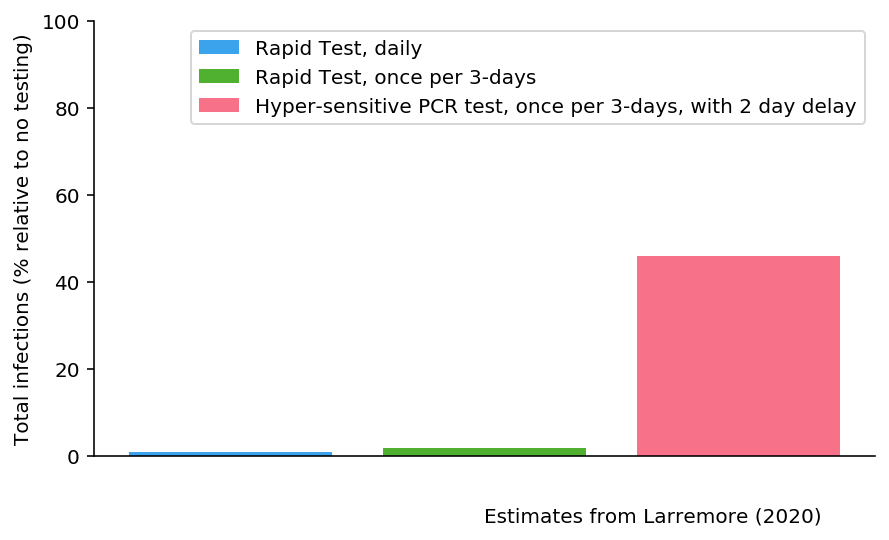

In [212]:
plt.figure(figsize=[7, 4])
plt.bar([0], [1], color=pal[2], label='Rapid Test, daily')
plt.bar([1], [2], color=pal[1], label='Rapid Test, once per 3-days')
plt.bar([2], [46], color=pal[0], label='Hyper-sensitive PCR test, once per 3-days, with 2 day delay')
plt.ylim([0, 100])
plt.legend()
plt.xticks([])
plt.ylabel('Total infections (% relative to no testing)')
sns.despine()
plt.text(1, -15, 'Estimates from Larremore (2020)')